![wompi](Wompi.png)
# **Prueba Técnica - Especialista analítica de negocio**
## Prueba Analítica: *Análisis de segmentación de comercios*
### Cientifico de Datos:

* Daniel Felipe Pérez Grajales . dfperezg@unal.edu.co<br>

<br><br>


---
<br>

**Objetivo:**

Realizar un análisis de segmentación de comercios a partir de datos transaccionales, identificando grupos con comportamientos similares y detectando oportunidades comerciales dentros de la industria.

**Instrucciones**

Se te entrega un archivo *payments_datasets.csv* con información de transacciones de pago Deberás:

1. Construir métricas a nivel de comercio como: número de transacciones, ticket promedio, tasa de aprobación y distribución de medios de pago.

2. Preparar el conjunto de datos para clustering, estandarizando variables y seleccionando las más relevantes para la segmentación.

3. Aplicar una técnica de clustering.

4. Analizar y describir los clusters, resaltando similitudes y diferencias entre ellos.

5. Detectar oportunidades comerciales dentro de cada industrial(merchant_ciiu), comparando comercios con caracteristicas similares pero diferencias marcadas en el uso de medios de pago.

**Entregables**

Debes entregar un archivo Jupyter Notebook (.ipynb) funcional que cumpla con estos pasos:


* Carga del dataset.  
* Cálculo de métricas por comercio.
* Ejecución del algoritmo de clustering y elección del número óptimo de clusters.
* Tabla de oportunidades comerciales mostrando pares de comercios comparables con brechas significativas en uso de medios de pago.
* Conclusiones y recomendaciones orientadas a negocio.



--------

<br>
Solución Análisis de segmentación:

0. Carga de Módulos.<br>
1. Carga del dataset.<br>
2. Cálculo de métricas por comercio.<br>
3. Ejecución del algoritmo de clustering y elección del número óptimo de clusters.<br>
4. Tabla de oportunidades comerciales mostrando pares de comercios comparables con brechas significativas en uso de medios de pago.<br>
5. Conclusiones y recomendaciones orientadas a negocio.

### o. Carga de Modulos requeridos

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado clustering
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### 1. Carga del dataset.

In [2]:
df_trans_comer= pd.read_csv(r'./payments_dataset.csv', sep=',')
print(df_trans_comer.shape)
df_trans_comer.head()

(12000, 8)


,id,merchant_id,merchant_name,merchant_ciiu,amount_in_cents,created_date,payment_method_type,status
0,1000000,1040,Comercio_1040,G4741,78240,2025-05-08 08:02:36,NEQUI,APPROVED
1,1000001,1007,Comercio_1007,I5610,21469,2025-04-03 20:33:29,BANCOLOMBIA,APPROVED
2,1000002,1001,Comercio_1001,G4711,73617,2025-06-27 15:29:33,PSE,APPROVED
3,1000003,1047,Comercio_1047,G4761,40190,2025-04-05 00:05:00,PSE,REFUNDED
4,1000004,1017,Comercio_1017,G4773,107172,2025-06-24 21:22:58,NEQUI,APPROVED


* ID
* ID del comerciante
* Nombre del comerciante
* CII del comerciante
* Importe en centavos
* Fecha de creación
* Tipo de método de pago
* Estado

In [3]:
df_trans_comer.describe(include='all')

,id,merchant_id,merchant_name,merchant_ciiu,amount_in_cents,created_date,payment_method_type,status
count,1.200000e+04,12000.000000,12000,12000,1.200000e+04,12000,11280,12000
unique,NaN,NaN,50,10,NaN,11998,5,3
top,NaN,NaN,Comercio_1043,G4741,NaN,2025-06-30 19:13:32,NEQUI,APPROVED
freq,NaN,NaN,271,1294,NaN,2,2504,10528
mean,1.006000e+06,1024.834000,NaN,NaN,7.808565e+04,NaN,NaN,NaN
std,3.464246e+03,14.418776,NaN,NaN,8.228226e+04,NaN,NaN,NaN
min,1.000000e+06,1000.000000,NaN,NaN,4.060000e+03,NaN,NaN,NaN
25%,1.003000e+06,1012.000000,NaN,NaN,3.143700e+04,NaN,NaN,NaN
50%,1.006000e+06,1025.000000,NaN,NaN,5.084900e+04,NaN,NaN,NaN
75%,1.008999e+06,1037.000000,NaN,NaN,9.005725e+04,NaN,NaN,NaN


### cantidad de comercios

In [4]:
df_trans_comer['merchant_name'].nunique()

50

### cant tipo de comercio

In [6]:
df_trans_comer['merchant_ciiu'].nunique()

10

### cantidad de transacciones por comercios

In [7]:
print(df_trans_comer['merchant_name'].value_counts(dropna=False))
print()
print(df_trans_comer['merchant_name'].value_counts(True,dropna=False)*100)

merchant_name
Comercio_1043    271
Comercio_1041    264
Comercio_1005    263
Comercio_1036    262
Comercio_1044    261
Comercio_1008    259
Comercio_1035    255
Comercio_1028    255
Comercio_1031    254
Comercio_1019    252
Comercio_1020    252
Comercio_1049    251
Comercio_1042    250
Comercio_1029    250
Comercio_1040    248
Comercio_1030    247
Comercio_1024    246
Comercio_1026    245
Comercio_1007    245
Comercio_1023    244
Comercio_1009    244
Comercio_1034    244
Comercio_1047    243
Comercio_1039    242
Comercio_1015    241
Comercio_1048    240
Comercio_1006    239
Comercio_1002    237
Comercio_1018    237
Comercio_1021    236
Comercio_1038    235
Comercio_1003    234
Comercio_1046    233
Comercio_1037    233
Comercio_1045    232
Comercio_1033    231
Comercio_1027    230
Comercio_1012    230
Comercio_1004    229
Comercio_1011    229
Comercio_1025    229
Comercio_1010    226
Comercio_1014    226
Comercio_1017    225
Comercio_1016    224
Comercio_1032    223
Comercio_1022    217

### Canales de pago

In [8]:
print(df_trans_comer['payment_method_type'].value_counts(dropna=False))
print()
print(df_trans_comer['payment_method_type'].value_counts(True,dropna=False)*100)

payment_method_type
NEQUI          2504
BANCOLOMBIA    2468
CARD           2288
CASH           2243
PSE            1777
NaN             720
Name: count, dtype: int64

payment_method_type
NEQUI          20.866667
BANCOLOMBIA    20.566667
CARD           19.066667
CASH           18.691667
PSE            14.808333
NaN             6.000000
Name: proportion, dtype: float64


### Estados de las transacciones

In [9]:
df_trans_comer.dtypes

id                      int64
merchant_id             int64
merchant_name          object
merchant_ciiu          object
amount_in_cents         int64
created_date           object
payment_method_type    object
status                 object
dtype: object

In [10]:
print(df_trans_comer['status'].value_counts(dropna=False))
print()
print(df_trans_comer['status'].value_counts(True,dropna=False)*100)

status
APPROVED    10528
DECLINED     1212
REFUNDED      260
Name: count, dtype: int64

status
APPROVED    87.733333
DECLINED    10.100000
REFUNDED     2.166667
Name: proportion, dtype: float64


### 2. Cálculo de métricas por comercio.

* número de transacciones.
* ticket promedio.
* tasa de aprobación y distribución de medios de pago.

In [11]:
df_trans_comer.head(3)

,id,merchant_id,merchant_name,merchant_ciiu,amount_in_cents,created_date,payment_method_type,status
0,1000000,1040,Comercio_1040,G4741,78240,2025-05-08 08:02:36,NEQUI,APPROVED
1,1000001,1007,Comercio_1007,I5610,21469,2025-04-03 20:33:29,BANCOLOMBIA,APPROVED
2,1000002,1001,Comercio_1001,G4711,73617,2025-06-27 15:29:33,PSE,APPROVED


In [12]:
df_trans_comer.dtypes

id                      int64
merchant_id             int64
merchant_name          object
merchant_ciiu          object
amount_in_cents         int64
created_date           object
payment_method_type    object
status                 object
dtype: object

### construcción de variables fecha

In [13]:
df_trans_comer['created_date']=pd.to_datetime(df_trans_comer['created_date'],format='%Y-%m-%d %H:%M:%S',errors='coerce')#datetime.date.today()
df_trans_comer['anio_mes'] = df_trans_comer['created_date'].dt.strftime('%Y%m') 
df_trans_comer.head()

,id,merchant_id,merchant_name,merchant_ciiu,amount_in_cents,created_date,payment_method_type,status,anio_mes
0,1000000,1040,Comercio_1040,G4741,78240,2025-05-08 08:02:36,NEQUI,APPROVED,202505
1,1000001,1007,Comercio_1007,I5610,21469,2025-04-03 20:33:29,BANCOLOMBIA,APPROVED,202504
2,1000002,1001,Comercio_1001,G4711,73617,2025-06-27 15:29:33,PSE,APPROVED,202506
3,1000003,1047,Comercio_1047,G4761,40190,2025-04-05 00:05:00,PSE,REFUNDED,202504
4,1000004,1017,Comercio_1017,G4773,107172,2025-06-24 21:22:58,NEQUI,APPROVED,202506


### transacciones por mes

In [14]:
print(df_trans_comer['anio_mes'].value_counts(dropna=False))
print()
print(df_trans_comer['anio_mes'].value_counts(True,dropna=False)*100)

anio_mes
202503    2098
202507    2061
202505    2059
202506    2028
202504    2010
202502     897
202508     847
Name: count, dtype: int64

anio_mes
202503    17.483333
202507    17.175000
202505    17.158333
202506    16.900000
202504    16.750000
202502     7.475000
202508     7.058333
Name: proportion, dtype: float64


### Meticas generales

In [15]:
# Cálculo de métricas por comercio
metrics = df_trans_comer.groupby(['merchant_name','merchant_ciiu']).agg(
    num_transacciones=('id', 'count'),
    ticket_promedio=('amount_in_cents', 'mean'),
    tasa_aprobacion=('status', lambda x: (x == 'APPROVED').mean()),
).reset_index()
# Distribución de medios de pago por comercio
payment_dist = pd.crosstab(df_trans_comer['merchant_name'], df_trans_comer['payment_method_type'], normalize='index')
metrics = metrics.join(payment_dist, on=['merchant_name'])
print(metrics.shape)
metrics.head(10)


(50, 10)


,merchant_name,merchant_ciiu,num_transacciones,ticket_promedio,tasa_aprobacion,BANCOLOMBIA,CARD,CASH,NEQUI,PSE
0,Comercio_1000,G4711,211,35328.113744,0.876777,0.023697,0.028436,0.895735,0.033175,0.018957
1,Comercio_1001,G4711,215,35789.576744,0.920930,0.191919,0.303030,0.000000,0.267677,0.237374
2,Comercio_1002,G4711,237,26143.118143,0.945148,0.244019,0.267943,0.000000,0.186603,0.301435
3,Comercio_1003,G4711,234,35341.572650,0.888889,0.051282,0.042735,0.833333,0.038462,0.034188
4,Comercio_1004,G4711,229,35537.213974,0.868996,0.309524,0.233333,0.000000,0.190476,0.266667
5,Comercio_1005,I5610,263,50969.566540,0.939163,0.254310,0.262931,0.306034,0.000000,0.176724
6,Comercio_1006,I5610,239,44879.087866,0.916318,0.054393,0.041841,0.046025,0.828452,0.029289
7,Comercio_1007,I5610,245,46138.983673,0.848980,0.253333,0.217778,0.200000,0.000000,0.328889
8,Comercio_1008,I5610,259,48679.378378,0.810811,0.202532,0.270042,0.282700,0.000000,0.244726
9,Comercio_1009,I5610,244,47799.606557,0.930328,0.040984,0.057377,0.016393,0.836066,0.049180


In [16]:
# BD_metri_come=df_trans_comer.groupby(['merchant_ciiu']).size().reset_index(name='cant_trans_ult_7_mes')#'merchant_name'
# print(BD_metri_come.shape)
# BD_metri_come.head(10)

In [17]:
# BD_metri_come_2=df_trans_comer.groupby(['merchant_ciiu','status']).size().reset_index(name='cant_trans_ult_7_mes')#'merchant_name'
# BD_metri_come_2_1= BD_metri_come_2.pivot_table(values='cant_trans_ult_7_mes', index='merchant_ciiu', columns='status', fill_value=0).reset_index()
# print(BD_metri_come_2_1.shape)
# BD_metri_come_2_1.head(10)

### 3. Ejecución del algoritmo de clustering y elección del número óptimo de clusters.

In [18]:
metrics.dtypes

merchant_name         object
merchant_ciiu         object
num_transacciones      int64
ticket_promedio      float64
tasa_aprobacion      float64
BANCOLOMBIA          float64
CARD                 float64
CASH                 float64
NEQUI                float64
PSE                  float64
dtype: object

#### estandarización de variables (StandardScaler)

In [19]:
### seleccion de variables por PCA
num_attributes = ['num_transacciones', 'ticket_promedio', 'tasa_aprobacion',
       'BANCOLOMBIA', 'CARD', 'CASH', 'NEQUI', 'PSE']
cat_attributes = ['merchant_ciiu']

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_prepared = pipeline.fit_transform(metrics)
df_prepared

array([[-2.07481880e+00, -6.73365906e-01, -1.08452265e-02,
        -7.45014077e-01, -7.88427393e-01,  3.11738998e+00,
        -7.29263388e-01, -1.34600307e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.78863690e+00, -6.66273754e-01,  1.07843758e+00,
        -9.27250265e-02,  4.48380208e-01, -8.87757510e-01,
         1.86030595e-01,  7.07421824e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.14636428e-01, -8.14528658e-01,  1.67589777e+00,
         1.09294459e-01,  2.90340655e-01, -8.87757510e-01,
        -1.30412915e-01,  1.30969268e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e

### seleccion de variables por PCA

In [20]:
# Preserving 95% of the variance
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_prepared)
df_reduced.shape

(50, 10)

In [100]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import seaborn as sns

# # features = metrics.drop(['merchant_ciiu'], axis=1)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_reduced)
# X_scaled

### Elegir el número óptimo de clusters(método del codo)

In [21]:
k_range = range(2, 10)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

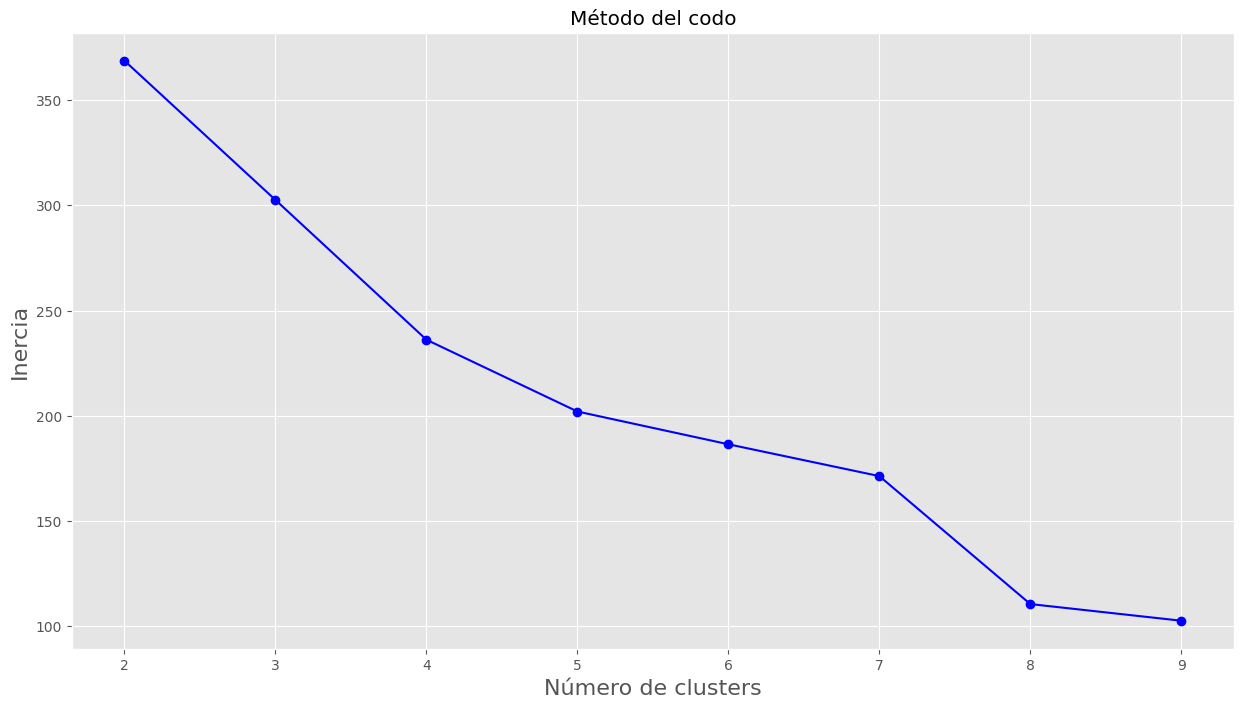

In [22]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-', marker='o')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

#### identificar numero de K óptimo 

In [23]:
silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                      for model in kmeans_per_k]

In [24]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
# Best number of clusters
best_k

4

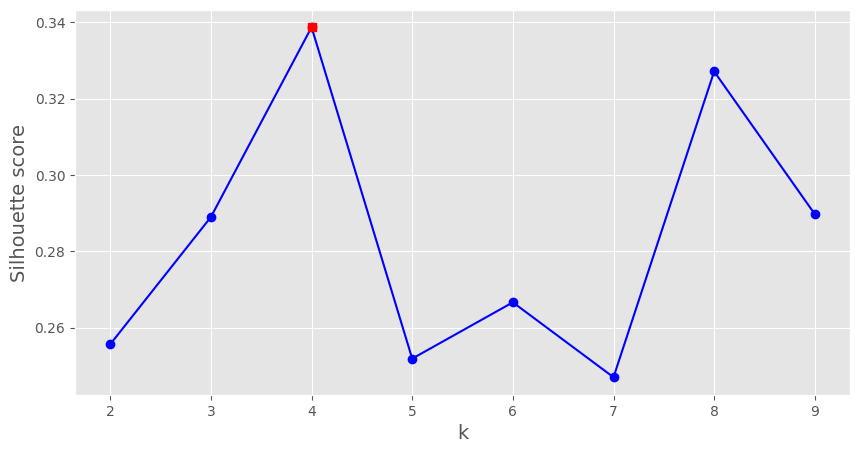

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

In [26]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=4, random_state=42)

In [27]:
metrics['cluster'] = best_model.fit_predict(df_reduced)
metrics.head(10)

,merchant_name,merchant_ciiu,num_transacciones,ticket_promedio,tasa_aprobacion,BANCOLOMBIA,CARD,CASH,NEQUI,PSE,cluster
0,Comercio_1000,G4711,211,35328.113744,0.876777,0.023697,0.028436,0.895735,0.033175,0.018957,0
1,Comercio_1001,G4711,215,35789.576744,0.920930,0.191919,0.303030,0.000000,0.267677,0.237374,1
2,Comercio_1002,G4711,237,26143.118143,0.945148,0.244019,0.267943,0.000000,0.186603,0.301435,1
3,Comercio_1003,G4711,234,35341.572650,0.888889,0.051282,0.042735,0.833333,0.038462,0.034188,0
4,Comercio_1004,G4711,229,35537.213974,0.868996,0.309524,0.233333,0.000000,0.190476,0.266667,1
5,Comercio_1005,I5610,263,50969.566540,0.939163,0.254310,0.262931,0.306034,0.000000,0.176724,1
6,Comercio_1006,I5610,239,44879.087866,0.916318,0.054393,0.041841,0.046025,0.828452,0.029289,2
7,Comercio_1007,I5610,245,46138.983673,0.848980,0.253333,0.217778,0.200000,0.000000,0.328889,1
8,Comercio_1008,I5610,259,48679.378378,0.810811,0.202532,0.270042,0.282700,0.000000,0.244726,1
9,Comercio_1009,I5610,244,47799.606557,0.930328,0.040984,0.057377,0.016393,0.836066,0.049180,2


### 4. Tabla de oportunidades comerciales mostrando pares de comercios comparables con brechas significativas en uso de medios de pago.

In [32]:
# Comparar comercios del mismo cluster con diferencias en medios de pago
opportunities = []
for cluster in metrics['cluster'].unique():
    group = metrics[metrics['cluster'] == cluster]
    for i, row1 in group.iterrows():
        for j, row2 in group.iterrows():
            if i < j:
                diff = np.abs(row1[payment_dist.columns] - row2[payment_dist.columns])
                if diff.max() > 0.2:  # umbral de diferencia significativa
                    opportunities.append({
                        'merchant_ciiu_1': row1['merchant_ciiu'],
                        'merchant_ciiu_2': row2['merchant_ciiu'],
                        'max_diff_payment': diff.idxmax(),
                        'diff_value': diff.max(),
                        'cluster': cluster
                    })
opportunities_df = pd.DataFrame(opportunities)
print(opportunities_df.shape)
print(opportunities_df.head(20))

(450, 5)
   merchant_ciiu_1 merchant_ciiu_2 max_diff_payment  diff_value  cluster
0            G4711           I5610             CASH    0.306034        1
1            G4711           I5610            NEQUI    0.267677        1
2            G4711           I5610             CASH    0.282700        1
3            G4711           G4751            NEQUI    0.267677        1
4            G4711           G4751             CASH    0.296117        1
5            G4711           G4751            NEQUI    0.267677        1
6            G4711           R9311             CARD    0.303030        1
7            G4711           R9311             CARD    0.565614        1
8            G4711           R9311             CARD    0.558721        1
9            G4711           R9311             CASH    0.316514        1
10           G4711           R9311             CARD    0.303030        1
11           G4711           S9602             CASH    0.200935        1
12           G4711           S9602        

In [50]:
resumen= pd.DataFrame(metrics[['num_transacciones', 'ticket_promedio',
       'tasa_aprobacion', 'BANCOLOMBIA', 'CARD', 'CASH', 'NEQUI', 'PSE',
       'cluster']].groupby('cluster').mean()).reset_index()
resumen

,cluster,num_transacciones,ticket_promedio,tasa_aprobacion,BANCOLOMBIA,CARD,CASH,NEQUI,PSE
0,0,233.500000,45415.527297,0.893157,0.041135,0.034294,0.859507,0.032363,0.032701
1,1,241.588235,79681.737932,0.871504,0.155319,0.281149,0.179177,0.163642,0.220713
2,2,236.666667,139151.644666,0.884832,0.039915,0.040604,0.035452,0.841898,0.042131
3,3,238.666667,38556.629709,0.891350,0.851126,0.039036,0.030735,0.042681,0.036422


In [53]:
resumen.dtypes

cluster                int32
num_transacciones    float64
ticket_promedio      float64
tasa_aprobacion      float64
BANCOLOMBIA          float64
CARD                 float64
CASH                 float64
NEQUI                float64
PSE                  float64
dtype: object

In [48]:
metrics_2=pd.DataFrame(metrics.groupby('cluster')['merchant_ciiu'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)).reset_index()
metrics_2

,cluster,merchant_ciiu
0,0,G4711
1,1,G4741
2,2,G4751
3,3,G4761


In [54]:
metrics_2.dtypes

cluster           int32
merchant_ciiu    object
dtype: object

In [56]:
resumen_final_analisis = resumen.merge(metrics_2, on='cluster', how='left')
print(resumen_final_analisis.shape)
resumen_final_analisis.head(10)

(4, 10)


,cluster,num_transacciones,ticket_promedio,tasa_aprobacion,BANCOLOMBIA,CARD,CASH,NEQUI,PSE,merchant_ciiu
0,0,233.500000,45415.527297,0.893157,0.041135,0.034294,0.859507,0.032363,0.032701,G4711
1,1,241.588235,79681.737932,0.871504,0.155319,0.281149,0.179177,0.163642,0.220713,G4741
2,2,236.666667,139151.644666,0.884832,0.039915,0.040604,0.035452,0.841898,0.042131,G4751
3,3,238.666667,38556.629709,0.891350,0.851126,0.039036,0.030735,0.042681,0.036422,G4761


### 5. Conclusiones y recomendaciones orientadas a negocio.

In [58]:
resumen_final_analisis.head()

,cluster,num_transacciones,ticket_promedio,tasa_aprobacion,BANCOLOMBIA,CARD,CASH,NEQUI,PSE,merchant_ciiu
0,0,233.500000,45415.527297,0.893157,0.041135,0.034294,0.859507,0.032363,0.032701,G4711
1,1,241.588235,79681.737932,0.871504,0.155319,0.281149,0.179177,0.163642,0.220713,G4741
2,2,236.666667,139151.644666,0.884832,0.039915,0.040604,0.035452,0.841898,0.042131,G4751
3,3,238.666667,38556.629709,0.891350,0.851126,0.039036,0.030735,0.042681,0.036422,G4761


## Conclusiones:

- Se identificaron 4 clusters de comercios con comportamientos similares en cuanto al número de transacciones y la tasa de aprobación de las transacciones.

#### sus principales caracteristicas son:

- **cluster 0:** el Tipo de comercio de predomina es el G4711, con un ticket promedio de 45415.53 centavos,el medio de pago que predomina es el CASH con un 85,95% de las transacciones, Se pueden considerar como **Tradicionales** en medio de pago.

- **cluster 1:** el Tipo de comercio de predomina es el G4741, con un ticket promedio de 79681.74 centavos,el medio de pago que predomina es el CARD con un 28,11% de las transacciones, Se pueden considerar como **Multicanales** en medio de pago.

- **cluster 2:** el Tipo de comercio de predomina es el G4751, con un ticket promedio de 139151,64 centavos el más alto de todos los grupos,el medio de pago que predomina es NEQUI con un 84,19% de las transacciones, Se pueden considerar como **Digitales Nequí** en medio de pago.

- **cluster 3:** el Tipo de comercio de predomina es el G4761, con un ticket promedio de 38556.63 centavos,el medio de pago que predomina es BANCOLOMBIA con un 85,11% de las transacciones, Se pueden considerar como **Digitales Bancolombia** en medio de pago.

- Se recomienda enfocar estrategias comerciales en comercios con baja adopción de medios Digitales(Bancolombia,Nequi,PSE), como los comercios del cluster 0 , tipos de comercio G4711.

--------------------------
Fin
